# Introdução

A transformação para domínios alternativos ao tempo contínuo ou discreto pode provê características importantes para análise do sinal. Em particular a transformação para o dominío da frequência utilizando a transformada de Fourier visa exibir comportamentos relativos as parte que compoem o sinal.

Qualquer sinal pode ser representado como uma soma infinita de senos e cossenos, tais componentes são chamadas de harmônicos. Então, uma análise em dominio da frequência pela transformada de fourier (também chamada de análise espectral) induz ao projetista identificar de forma direta as componentes e frequências presentes naquele sinal. Esta é uma forma de ver as menores partes presentes em um sinal.

Em relação as imagens o processamento desta transformada é traduzida matematicamente pela aplicação da seguinte transfomada no sinal:

$$F[m,n] = \frac{1}{UV} \int_o^U \int_o^V F(u,v) e^{j2\pi(um.x0 + un.y0} du dv$$

## Implementação e discussões

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- Abrir imagem:

In [2]:
img = np.array(cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE))
rows, cols = img.shape

- Aplicar a transformada discrea de Fourier:

In [3]:
img_dft = np.fft.fft2(img)

- Trazer a componente DC para o centro da imagem, transladando n/2 nas duas direções: 

In [4]:
img_dft_shift = np.fft.fftshift(img_dft)

- Calcular a magnitude a partir da componente real e imaginária:

In [5]:
img_dft_mag = np.abs(img_dft_shift)

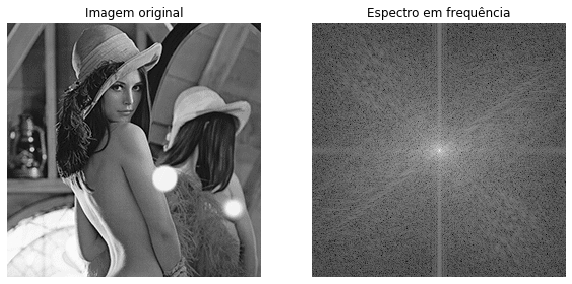

In [6]:
plt.figure(2,figsize=(10,9))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title("Imagem original")
plt.axis('OFF')

plt.subplot(122)
plt.imshow(20*np.log(img_dft_mag), 'gray')
plt.title("Espectro em frequência")
plt.axis('OFF')

plt.show()

- Cálculo da inversa:

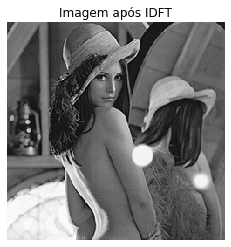

In [7]:
img_idft = np.fft.ifft2(img_dft)
img_inversa = np.abs(img_idft)
#print(img_idft)

plt.figure(3)
plt.imshow(img_inversa, 'gray')
plt.title("Imagem após IDFT")
plt.axis('OFF')

plt.show()

O processo de conversão para o domínio da frequência, utilizando a transformada de Fourier provê uma forma gráfica de retirar informações da imagem. No centro do espectro está a componente DC, de frequência zero, e os valores de frequência aumentam no sentido do centro para a borda da imagem.

O processo de transformada inversa foi realizado com éxito, retornando para a imagem original.

## Filtragem na frequência

Assim como no domínio do tempo, é possível realizar processos de filtragem no dominio da frequência. Enquanto no domínio espacial um processo de filtragem era representado por uma convolução entre dois sinais, no domníno da frequência é representado por uma simples multiplicação ponto a ponto, simplificando bastante o processo de filtragem.

### Filtro passa-baixa:

- Criar máscara gaussiana 

In [8]:
def gaussianKernel(h1, h2):

    import numpy as np
    import matplotlib.pyplot as plt
    import math as m

    ## Returns a normalized 2D gauss kernel array for general purporses

    x, y = np.mgrid[0:h2, 0:h1]
    x = x-h2/2
    y = y-h1/2
    sigma = 1
    g = np.exp( -( x**2 + y**2 ) / (2*sigma**2) )
    return g / g.sum()

filterKernel = gaussianKernel(rows,cols)

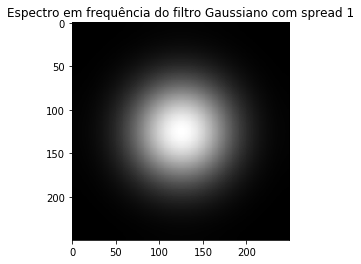

In [9]:
filter_dft = np.fft.fft2(filterKernel)
filter_dft_shift = np.fft.fftshift(filter_dft)
filter_dft_mag = np.abs(filter_dft_shift)

plt.figure(3+1)
plt.imshow(filter_dft_mag, 'gray')
plt.title("Espectro em frequência do filtro Gaussiano com spread 1")
plt.show()

- Filtragem na frequência

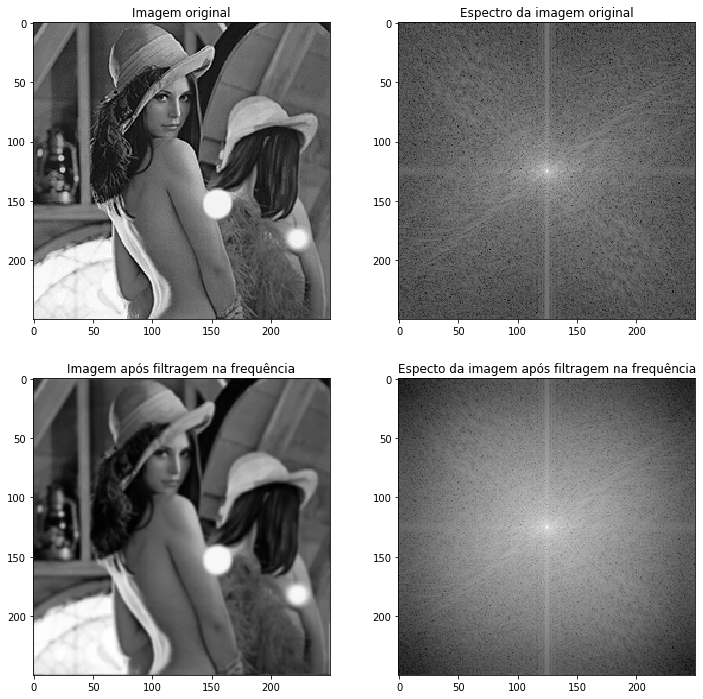

In [10]:
filter_img = img_dft_shift * filter_dft_shift
filter_img_mag = np.abs(filter_img)

img_back = np.fft.fftshift(np.fft.ifft2(filter_img))

img_back_mag = np.abs(img_back)


plt.figure(5, figsize=(12,12))
plt.subplot(221)
plt.imshow((img), 'gray')
plt.title("Imagem original")

plt.subplot(222)
plt.imshow(20*np.log(img_dft_mag), 'gray')
plt.title("Espectro da imagem original")

plt.subplot(223)
plt.imshow(img_back_mag, 'gray')
plt.title("Imagem após filtragem na frequência")

plt.subplot(224)
plt.imshow(20*np.log(filter_img_mag), 'gray')
plt.title("Especto da imagem após filtragem na frequência")

plt.show()

O filtro escolhido foi o filtro gaussino, funcionando como passa-baixa, pois atenua frequências altas frequência e permite a passagem de frequências abaixo o valor da frequência de corte.

O efeito de borramento ao final da imagem é explicado pela comparação entre o espectro original e o espectro após filtragem da seguinte forma: valores incostante e pontuais, são traduzidos como transições repentinas (alta frequência) na imagem e vistas nos espectro de forma pontual, após a aplicação do filtro passa-baixa estas transições são atenuada e o espector exibe menos transições, o resultado após a transformada inversa é a imagem original, porém com o efeito de borramento, já esperado pelo filtro gaussiano.

# Conclusões

A análise de imagens no domínio da frequência é uma ferramenta que provê análises visuais perante a imagem, exibe padrões de comportamento das cores na imagem, podem resultar em identificação de componentes como ruído ou objetos ao olhar para o espectro.

Há a possibilidade de realizar filtragem no domínio da frequência, assim no domínio temporal, é um processa mais rápido pois envolve uma multiplica simples ponto a ponto, talvez o grande parte do custo computacional em executar tal técnica está em realizar a transformada direta e inversa de Fourier.